Vocabulary Size: 48


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.0356 - loss: 3.8712
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0733 - loss: 3.8626
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0837 - loss: 3.8529
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0837 - loss: 3.8350
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0941 - loss: 3.8011 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1046 - loss: 3.7431
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0816 - loss: 3.7033
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0711 - loss: 3.6930
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0690 - loss: 3.6532 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1089 - loss: 3.6431
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.1297 - loss: 3.6088
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1297 - loss: 3

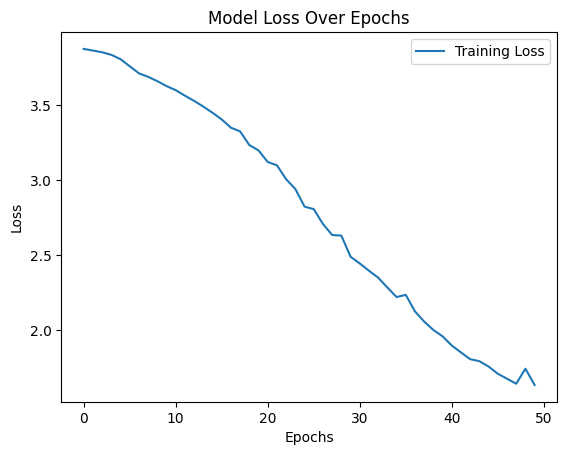

In [1]:
# Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Prepare the text data
text = """
Once upon a time in a land far away, there was a young prince who dreamed of adventure.
He longed to explore the forests, climb mountains, and sail across the seas.
But his duties in the kingdom kept him tied to the castle.
One day, a mysterious traveler arrived, bringing stories of distant lands and great treasures.
"""

# Convert text to lowercase and split into sentences
text = text.lower()

# Step 2: Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])  # Create a mapping of words to integers
total_words = len(tokenizer.word_index) + 1  # Total vocabulary size
print(f"Vocabulary Size: {total_words}")

# Generate sequences of words
input_sequences = []
for line in text.split("."):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Step 3: Pad sequences to ensure uniform length
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Split into predictors (X) and labels (y)
X = input_sequences[:, :-1]  # All words except the last
y = input_sequences[:, -1]   # The last word is the target
y = to_categorical(y, num_classes=total_words)

# Step 4: Build the RNN model with LSTM
model = Sequential([
    Embedding(total_words, 50, input_length=max_sequence_len-1),  # Word embeddings
    LSTM(150, return_sequences=True),  # LSTM layer with 150 units
    LSTM(100),  # Another LSTM layer with 100 units
    Dense(total_words, activation='softmax')  # Output layer for predicting next word
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Step 5: Train the model
history = model.fit(X, y, epochs=50, verbose=1)

# Step 6: Generate text using the trained model
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Test text generation
seed_text = "a mysterious traveler"
generated_text = generate_text(seed_text, next_words=20, model=model, max_sequence_len=max_sequence_len)
print("\nGenerated Text:")
print(generated_text)

# Step 7: Visualize training performance
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
